# Проект: Анализ продаж видеоигр и выявление факторов успеха

**Описание проекта**

Интернет-магазин компьютерных игр «Стримчик» планирует запустить рекламную кампанию и увеличить продажи в 2017 году. Для этого необходимо проанализировать исторические данные о продажах видеоигр, доступные из открытых источников. В датасете содержится информация о названиях игр, платформах (Xbox, PlayStation и др.), жанрах, оценках пользователей и критиков, объемах продаж в различных регионах, а также возрастных рейтингах ESRB.

Мы рассмотрим данные за период до 2016 года. Наша задача — выявить ключевые закономерности, которые влияют на успешность игры, чтобы помочь бизнесу сделать ставку на потенциально популярный продукт в 2017 году.

**Цель исследования**

Выявить факторы, влияющие на глобальные продажи видеоигр, на основе данных до 2016 года, чтобы:
- определить перспективные жанры и платформы;
- изучить влияние оценок пользователей и критиков;
- понять роль возрастного рейтинга ESRB;
- выявить закономерности, которые помогут спрогнозировать успешные игры;
- сформировать рекомендации для рекламной кампании и ассортимента на 2017 год.

**Ход исследования**

В ходе исследования будут проведены:
- Предобработка данных;
- Исследовательский анализ данных;
- Анализ портретов пользователей по регионам;
- Проверка гипотез;

В результате будет сформулирован общий вывод с рекомендациями для заказчика.

## Ознакомление с данными

In [1]:
# импортируем нужные библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
# сохраняем датасет в переменную
data = pd.read_csv('games.csv')

In [3]:
# ознакомление с датафреймом
data.head(15)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
# для удобства приведем названия столбцов к нижнему регистру
data.columns = data.columns.str.lower()

**Описание данных**
- **name** — название игры
- **platform** — платформа
- **year_of_release** — год выпуска
- **genre** — жанр игры
- **na_sales** — продажи в Северной Америке (миллионы проданных копий)
- **eu_sales** — продажи в Европе (миллионы проданных копий)
- **jp_sales** — продажи в Японии (миллионы проданных копий)
- **other_sales** — продажи в других странах (миллионы проданных копий)
- **critic_score** — оценка критиков (максимум 100)
- **user_score** — оценка пользователей (максимум 10)
- **rating** — рейтинг от организации ESRB (англ. Entertainment Software Rating Board)*


*Ассоциация ESRB определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [5]:
data.info() # общая информация о данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
data.describe() # статистическое описание данных

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


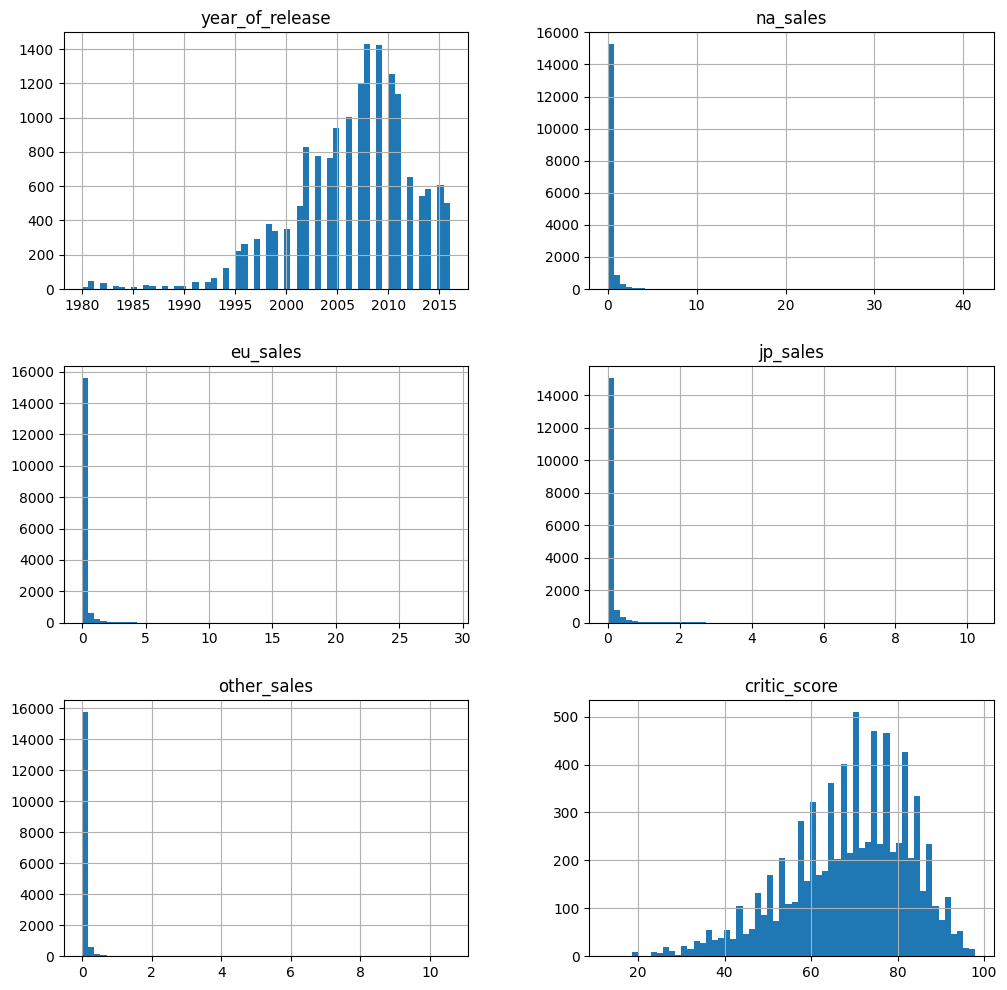

In [7]:
data.hist(figsize=(12, 12), bins=60); # построение гистограмм для всех числовых столбцов таблицы

<div style="border: 2px solid black; padding: 10px;">
  <strong>На этапе предобработки требуется:</strong>
  <ul>
    <li>Проверить датафрейм на наличие пропусков и устранить их;</li>
    <li>Проверить датафрейм на наличие явных и неявных дубликатов и устранить их;</li> 
    <li>Изменить тип данных некоторых столбцов;</li> 
    <li>Добавить дополнительный столбец в датасет;</li>
    <li>Обработать имеющиеся аномальные значения, включающие ошибки и выбросы.</li> 
  
  После предобработки данные будут пригодны для дальнейшего анализа.  
  </ul>
</div>

## Предобработка данных

### Обработка дубликатов

Сначала проверим датасет на наличие явных дубликатов, затем вручную найдем и обработаем неявные дубликаты в других строковых столбцах. И только после этого корректно обработаем пропуски, так как местами нам может понадобиться заполнение пропусков с группировкой по другим столбцам (к этому моменту в них не будет пропусков и дубликатов).

In [8]:
# проверяем данные на наличие явных дубликатов
data.duplicated().sum()

np.int64(0)

Явных дубликатов в датасете нет. Проверяем данные на наличие неявных дубликатов в категориальных столбцах:

In [9]:
# проверим уникальные значения столбца year_of_release
data['year_of_release'].dropna().sort_values().unique()

array([1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987., 1988.,
       1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997.,
       1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006.,
       2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
       2016.])

In [10]:
# проверим уникальные значения столбца genre
sorted(data['genre'].dropna().unique())

['Action',
 'Adventure',
 'Fighting',
 'Misc',
 'Platform',
 'Puzzle',
 'Racing',
 'Role-Playing',
 'Shooter',
 'Simulation',
 'Sports',
 'Strategy']

In [11]:
# проверим уникальные значения столбца platform
data['platform'].dropna().sort_values().unique()

array(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360',
       'XB', 'XOne'], dtype=object)

In [12]:
# проверим уникальные значения столбца rating
data['rating'].dropna().sort_values().unique()

array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T'], dtype=object)

In [13]:
# проверим уникальные значения столбца critic_score
data['critic_score'].dropna().sort_values().unique()

array([13., 17., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29.,
       30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42.,
       43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55.,
       56., 57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68.,
       69., 70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81.,
       82., 83., 84., 85., 86., 87., 88., 89., 90., 91., 92., 93., 94.,
       95., 96., 97., 98.])

In [14]:
# проверим уникальные значения столбца user_score
data['user_score'].dropna().sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd'], dtype=object)

Есть необычное значение "tbd". Скорее всего оно означает "to be determined", то есть оценка ещё не определена — игра вышла недавно, и пользовательские оценки не собраны или не опубликованы. Есть смысл заменить эти значения на NaN (пропуски), чтобы позже преобразовать тип данных столбца в вещественных (float64):

In [15]:
# заменяем 'tbd' на NaN
data['user_score'] = data['user_score'].replace('tbd', np.nan)

Отдельно проверять столбец **name** нет смысла: данных слишком много, к тому же игры с одним назанием могут выходить на разных платформах и в разные годы. Поэтому сгруппируем данные по **name**, **platform**, **year_of_release** и **genre** и проверяем их на наличие явных дубликатов:

In [16]:
# проверим уникальные значения одновременно в столбцах name, platform, year_of_release, genre
data.duplicated(subset=['name', 'platform', 'year_of_release', 'genre']).sum()

np.int64(2)

In [17]:
# удалим эти строки
data = data.drop_duplicates(subset=['name', 'platform', 'year_of_release', 'genre'])

<div style="border: 2px solid black; padding: 10px;">
  <strong>Итоги:</strong>
  <ul>
    <li>Явные дубликаты отсутствуют;</li>
    <li>В столбце <strong>user_score</strong> заменили текстовое обозначение отсутствующих данных "tbd" на пропуски;</li> 
    <li>Найдены и устранены дубликаты в данных, сгруппированных по ключевым столбцам - <strong>name, platform, year_of_release, genre</strong>;</li>  
    <li>В других столбцах дубликаты не найдены или поиск дубликатов в них не требовался.</li> 
  
  Теперь данные готовы к качественной обработке пропусков.  
  </ul>
</div>

### Обработка пропусков

In [18]:
# проверяем количество пропусков в данных
data.isna().sum()

name                  1
platform              0
year_of_release     269
genre                 1
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8577
user_score         9124
rating             6765
dtype: int64

Проверим, какой процент от исходных данных составляют пропуски:

In [19]:
# считаем процент пропусков для каждого столбца
(data.isna().sum() / len(data) * 100).round(2)

name                0.01
platform            0.00
year_of_release     1.61
genre               0.01
na_sales            0.00
eu_sales            0.00
jp_sales            0.00
other_sales         0.00
critic_score       51.32
user_score         54.59
rating             40.48
dtype: float64

In [20]:
# код ревьюера
(data.isna().mean() * 100).round(2)

name                0.01
platform            0.00
year_of_release     1.61
genre               0.01
na_sales            0.00
eu_sales            0.00
jp_sales            0.00
other_sales         0.00
critic_score       51.32
user_score         54.59
rating             40.48
dtype: float64

**name и genre**

Удалим самые малочисленные и скорее всего случайные пропуски в важных для анализа столбцах **name** и **genre**:

In [21]:
# удаляем пропуски
data = data.dropna(subset=['name', 'genre'])

**year_of_release**

Грамотно запонить пропуски в этом столбце не получится: информация слишком важная и должна быть точной для каждой игры. Пропусков мало - 263 (это примерно 1.61% исходных данных). Есть смысл удалить их:

In [22]:
# удаляем пропуски
data = data.dropna(subset=['year_of_release'])

**critic_score и user_score**

В этих столбцах самые многочисленные пропуски - 51-54% от исходных данных. Пропуски в этих колонках не случайны — часто у игры может не быть оценки, потому что она не популярна или только вышла. Лучше оставить пропуски, так как заполнение медианами и прочим может исказить результаты анализа.

**rating**

Пропусков много - около 40%. Пропуски в этом столбце могут объясняться тем, что имеют отношение к играм, выпущенными за пределами США (в частности, в Японии и Европе), где ESRB (американская система) просто не применяется. Так как столбец категориальный, есть смысл заполнить пропуски еще одной категорией - "unknown":

In [23]:
# заполняем пропуски "unknown"
data['rating'] = data['rating'].fillna('unknown')

Проверяем наличие пропусков во всех столбцах после их обработки:

In [24]:
# проверяем количество пропусков в данных
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

<div style="border: 2px solid black; padding: 10px;">
  <strong>Итоги:</strong>
  <ul>
    <li>На начало обработки пропуски присутствовали в 6 из 11 столбцов и составляли от 0.01% до 54.59% столбца;</li>
    <li>В результате получилось устранить пропуски в 4 из 6 столбцов, значительно снизив их общее количество;</li>
    <li>Удаление/заполнение оставшихся пропусков не имеет смысла и может исказить результаты анализа;</li>
    <li>Необходимо уточнить у профильных специалистов природу пропусков и попытаться восстановить данные, если это возможно.</li>  
  
  Для завершения предобработки остается изменить тип данных столбцов, добавить в датафрейм новый столбец-параметр и обработать аномальные значения.  
  </ul>
</div>

### Изменение типов данных

In [25]:
# проверяем типы данных
data.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

Необходимо изменить тип данных некоторых столбцов:

- **year_of_release** - меняем вещественный тип *float64* на целочисленный *int64*, так как год - это целое число.
- **user_score** - меняем строковый тип *object* на вещественный *float64*, так как данные столбца численные, но присутствуют пропуски.

In [26]:
# меняем тип данных
data['year_of_release'] = data['year_of_release'].astype(int)
data['user_score'] = data['user_score'].astype(float)

Проверяем изменения:

In [27]:
# проверяем типы данных
data.dtypes

name                object
platform            object
year_of_release      int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

<div style="border: 2px solid black; padding: 10px;">
  <strong>Итоги:</strong>
  <ul>
Исправили тип данных столбцов <strong>year_of_release</strong> и <strong>user_score</strong>. Теперь все столбцы имеют корректный тип данных.  
  </ul>
</div>

### Добавление новых столбцов в таблицу

Для дальнейшего анализа нам понадобится дополнительная информация - суммарные продажи во всех регионах. Создадим столбец и заполним его результатами подсчетов:

In [28]:
# создаем новый столбец с суммарными продажами
data['global_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

<div style="border: 2px solid black; padding: 10px;">
  <strong>Итоги:</strong>
  <ul>
    <li>Посчитаны суммарные продажи во всех регионах;</li>
    <li>Данные по продажам записаны в новый столбец <strong>global_sales</strong>.</li>
  
  Добавление этого параметра в основной датафрейм пригодится для дальнейшего анализа.  
  </ul>
</div>

### Обработка аномальных значений

<div style="border: 2px solid black; padding: 10px;">
  <strong>Итоги:</strong>
  <ul>
    <li>Обработка аномальных значений на данном этапе не требуется из-за специфики данных;</li>
    <li>Выбросы в количественных данных будут изучены на этапе исследовательского анализа данных.</li>  
  </ul>
</div>

## Исследовательский анализ данных

In [29]:
# зафиксируем общую информацию о предобработанном датафрейме
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16443 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           16443 non-null  object 
 11  global_sales     16443 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


### Выпуск игр по годам

Проверим, сколько игр выпускалось в разные годы. Это поможет понять, с какого года данные становятся репрезентативными, а также данные за какой период будут наиболее подходящими для дальнейшего анализа.

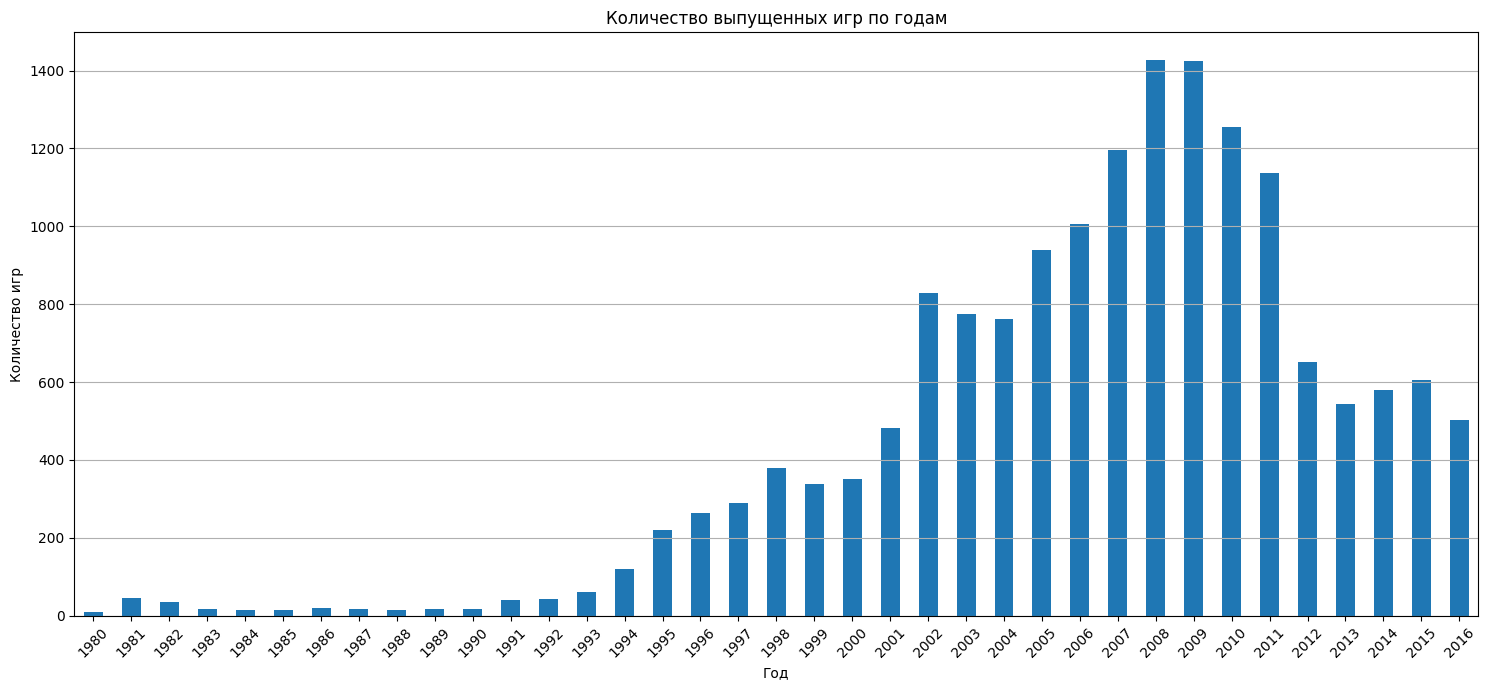

In [30]:
# считаем количество игр по каждому году
games_per_year = data['year_of_release'].value_counts().sort_index()

# строим график
games_per_year.plot(kind='bar', figsize=(15, 7))

plt.title('Количество выпущенных игр по годам', fontsize=12)
plt.xlabel('Год', fontsize=10)
plt.ylabel('Количество игр', fontsize=10)
plt.xticks(rotation=45)

plt.tight_layout()
plt.grid(axis='y')
plt.show()

<div style="border: 2px solid black; padding: 10px;">
  <strong>Наблюдения по years_of_release:</strong>
  <ul>
    <li>В 1980-х годах выпуск игр был минимальным, с небольшим ростом к концу десятилетия.</li>
    <li>С 1990-х начинается заметный рост, особенно с середины 1990-х. Рост связан с технологическим прогрессом (появление Windows, 3D-графики, PlayStation) и удешевлением разработки, а интернет начал способствовать распространению информации об играх.</li>
    <li>Пик выпуска приходится на 2007–2010 годы, когда ежегодно выходило около 1200-1400 игр. Технологический бум.</li>  
    <li>После 2010 года наблюдается заметный спад, но количество выпускаемых игр остаётся относительно высоким (около 600–800 в год) до 2016 года. Это может быть связано с возможным насыщением рынка и переключение аудитории на мобильные и онлайн-игры.</li> 
    <li>С учетом высокой динамичности рынка для дальнейшего анализа лучше взять период с 2013 по 2016, так как он лучше отражает актуальное состояние рынка (стабилизация после спада) и имеет достаточный объем данных для анализа.</li>  
  </ul>
</div>

### Анализ продаж по платформам за все время

Проверим, как менялись продажи по платформам. Для этого выберем платформы с наибольшими суммарными продажами и построим для них распределение по годам. Это поможет определить, за какой характерный срок появляются новые и исчезают старые платформы, что поможет выбрать актуальный период для дальнейшего исследования.

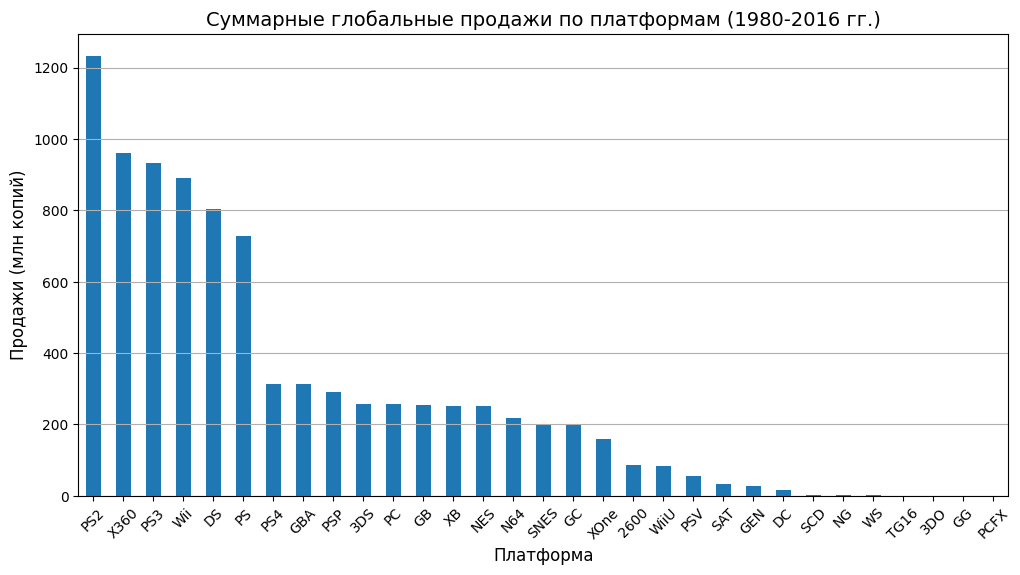

In [31]:
# группируем суммарные продажи по платформам за весь период
all_platform_sales = data.groupby('platform')['global_sales'].sum().sort_values(ascending=False)

# строим график
all_platform_sales.plot(kind='bar', figsize=(12, 6))

plt.title('Суммарные глобальные продажи по платформам (1980-2016 гг.)', fontsize=14)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Продажи (млн копий)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()

Рассмотрим топ-5 игровых платформ с наибольшими суммарными продажами по годам:
- **Play Station 2 (PS2)**. Была выпущена Sony в 2000 году и стала самой продаваемой консолью в истории — около 155 млн единиц. Поддерживала DVD, имела огромную библиотеку из 4000 игр, включая GTA: San Andreas и God of War.
- **Xbox 360 (X360)**. Microsoft выпустила Xbox 360 в 2005 году. Консоль продалась тиражом около 84 млн и прославилась мультиплеерным режимом в Xbox Live. Ключевые игры — Halo и Gears of War.
- **Play Station 3 (PS3)**. Была представлена Sony в 2006 году. С Blu-ray и мощной графикой, разошлась тиражом 87 млн. Хиты — Uncharted и The Last of Us.
- **Wii**. Nintendo выпустила Wii в 2006 году. Консоль с уникальным motion-контроллером Wii Remote, было продано около 101 млн экземпляров. Ориентирована на семейные игры вроде Wii Sports и Mario Galaxy.
- **Nintendo Dual Screen (DS)**. В 2004 году Nintendo представила портативную консоль с двумя экранами, один из которых сенсорный. Продано 154 млн единиц. Популярны Mario Kart DS и Pokémon.

In [32]:
# выделяем топ-5 платформ
top_5_platforms = all_platform_sales.head(5).index

# сгруппируем данные с количеством игр по платформам и годам
platform_year_counts = (data[data['platform'].isin(top_5_platforms)]
    .groupby(['platform', 'year_of_release'])['name']
    .count()
    .reset_index()
    .rename(columns={'name': 'game_count'}))

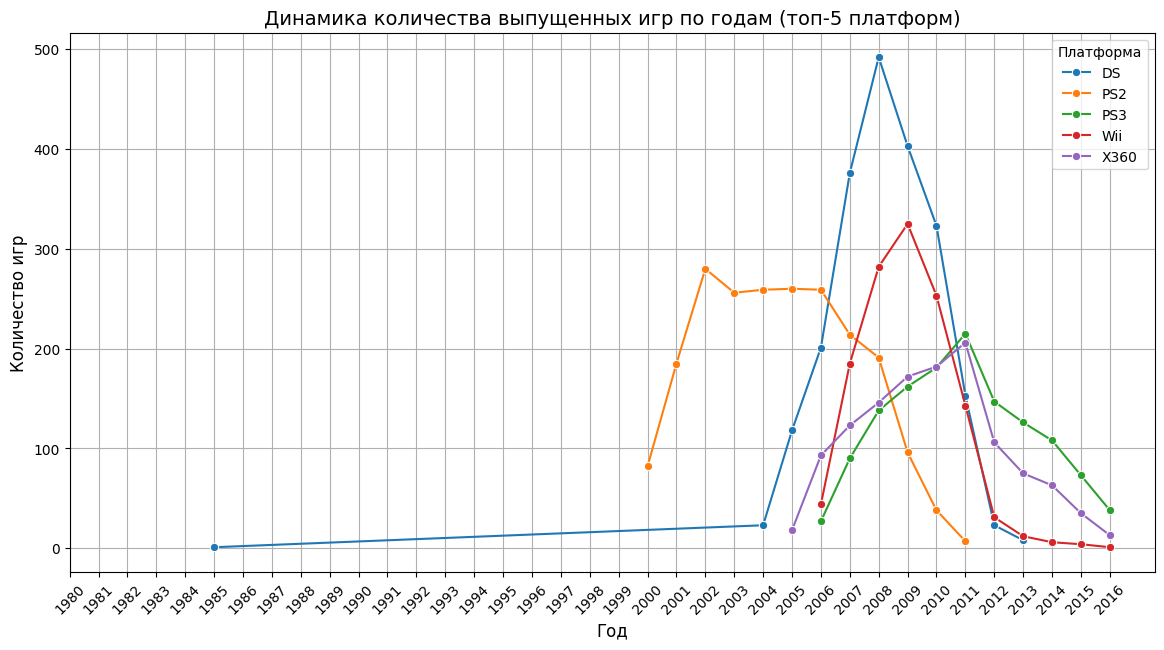

In [33]:
# построим график
plt.figure(figsize=(14, 7))

sns.lineplot(data=platform_year_counts, x='year_of_release', y='game_count', hue='platform', marker='o')

plt.title('Динамика количества выпущенных игр по годам (топ-5 платформ)', fontsize=14)
plt.xlabel('Год', fontsize=12)
plt.ylabel('Количество игр', fontsize=12)
plt.xticks(sorted(data['year_of_release'].unique()), rotation=45)
plt.grid(True)
plt.legend(title='Платформа')

plt.show()

Скорее всего аномальное значение для платформы Nintendo Dual Screen (DS) в районе 1985 года - ошибка, так как консоль вышла только в 2004 году. Удалим это значение:

In [34]:
# выведем строку
data.query('platform == "DS" and year_of_release < 1990')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,unknown,0.02


In [35]:
# удалим ее по индексу
data = data.drop(index = 15957)

Теперь перезапишем переменные и построим по ним корректный график:

In [36]:
# повторно группируем суммарные продажи по платформам за весь период
all_platform_sales = data.groupby('platform')['global_sales'].sum().sort_values(ascending=False)

# повторно выделяем топ-5 платформ
top_5_platforms = all_platform_sales.head(5).index

# повторно группируем данные с количеством игр по платформам и годам
platform_year_counts = (data[data['platform'].isin(top_5_platforms)]
    .groupby(['platform', 'year_of_release'])['name']
    .count()
    .reset_index()
    .rename(columns={'name': 'game_count'}))

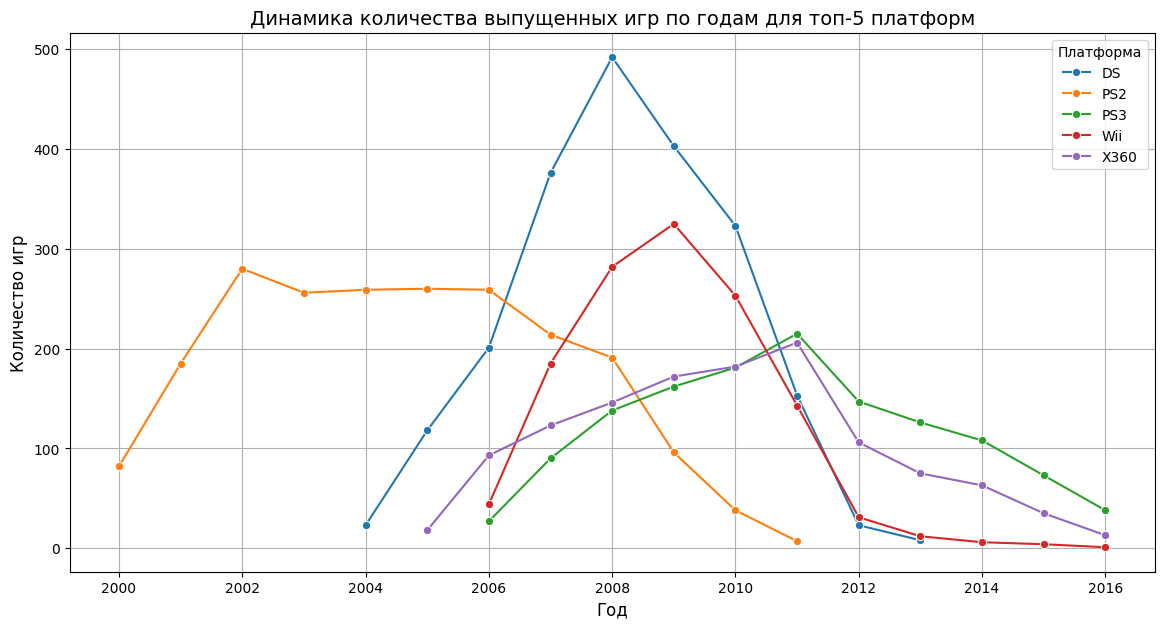

In [37]:
# повторно строим график
plt.figure(figsize=(14, 7))

sns.lineplot(data=platform_year_counts, x='year_of_release', y='game_count', hue='platform', marker='o')

plt.title('Динамика количества выпущенных игр по годам для топ-5 платформ', fontsize=14)
plt.xlabel('Год', fontsize=12)
plt.ylabel('Количество игр', fontsize=12)
plt.grid(True)
plt.legend(title='Платформа')

plt.show()

<div style="border: 2px solid black; padding: 10px;">
  <strong>Вывод:</strong>
  <ul> 
    Судя по графику, жизненный цикл популярных платформ составляет около 8–10 лет. Пик продаж и количества выпускаемвх игр достигается примерно через 3-5 лет, после чего платформа постепенно теряет популярность и заменяется более современной. Это наблюдение подтверждает, что логично ограничиться последними 3 годами наблюдений для анализа (2013–2016 гг.), чтобы отразить актуальные тренды.
  </ul>
</div>

### Анализ продаж по платформам за 2013-2016 гг.

На этом шаге исследуем:
- Глобальные продажи по платформам;
- Статистические описание глобальных продаж;
- Выбросы с помощью диаграммы размаха.

Учитывая результаты, полученные на предыдущих шагах, для дальнейшего анализа лучше взять период с 2013 по 2016, так как он лучше отражает актуальное состояние рынка (стабилизация после спада) с учетом жизненного цикла платформ и динамики изменений в индустрии:

In [38]:
# делаем срез актуальных для анализа данных
actual_data = data[data['year_of_release'] >= 2013]

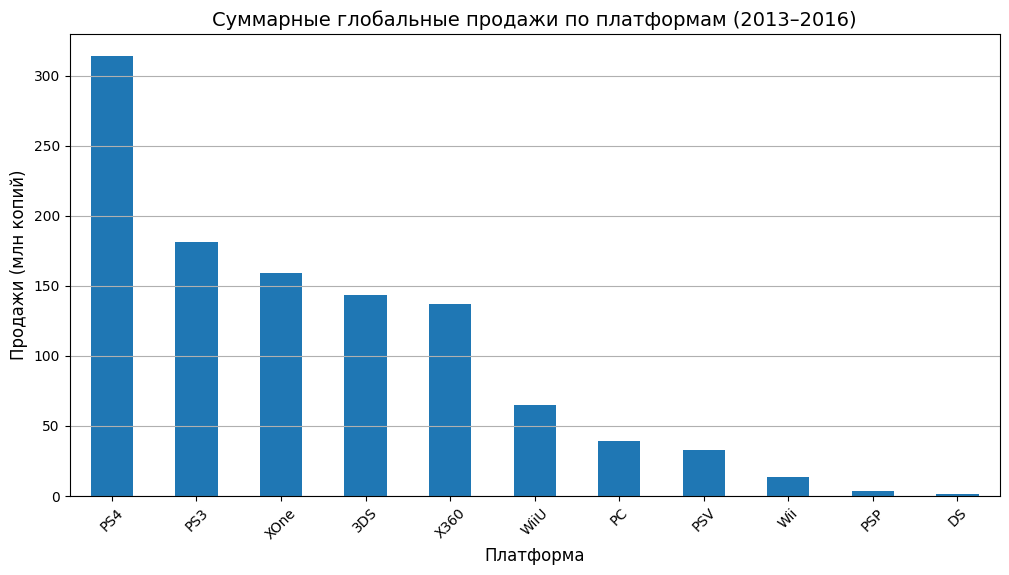

In [39]:
# группируем суммарные продажи по платформам за актуальный период
actual_platform_sales = actual_data.groupby('platform')['global_sales'].sum().sort_values(ascending=False)

# строим график
actual_platform_sales.plot(kind='bar', figsize=(12, 6))

plt.title('Суммарные глобальные продажи по платформам (2013–2016)', fontsize=14)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Продажи (млн копий)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()

На графике за период 2013-2016 гг. в топ попадают более новые модели, а именно:
- **PlayStation 4 (PS4)** — одна из самых популярных и мощных игровых платформ своего поколения от Sony. С момента запуска в 2013 году PS4 быстро завоевала рынок благодаря высокому качеству графики, широкому выбору эксклюзивных игр и сильной поддержке со стороны разработчиков.
- **Nintendo 3DS** — портативная игровая консоль, отличающаяся уникальным 3D-экраном и ориентацией на семейную и молодёжную аудиторию. Запущенная в 2011 году, 3DS пользовалась устойчивым спросом благодаря большому количеству игр в жанрах Action и Adventure.
- **Xbox One (XOne)** — консоль от Microsoft, выпущенная в 2013 году, ориентированная на широкую аудиторию и мультимедийные возможности. Хотя XOne уступает PS4 в глобальных продажах, она занимает уверенные позиции.

Проанализируем динамику топ-10 игровых платформ с наибольшими продажами за 2013-2016 годы:

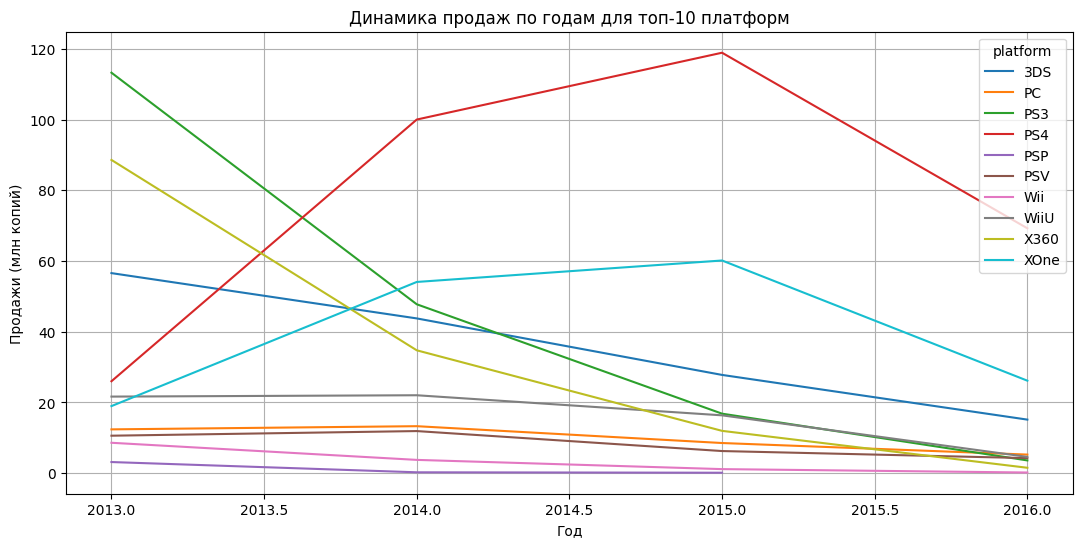

In [40]:
# выделяем топ-10 актуальных платформ
top_10_platforms = actual_platform_sales.head(10).index

# группируем по платформе и году
sales_by_year = actual_data[actual_data['platform'].isin(top_10_platforms)] \
    .pivot_table(index='year_of_release',
                 columns='platform',
                 values='global_sales',
                 aggfunc='sum')

# строим график
sales_by_year.plot(figsize=(13, 6))

plt.title('Динамика продаж по годам для топ-10 платформ')
plt.xlabel('Год')
plt.ylabel('Продажи (млн копий)')
plt.grid(True)

plt.show()

<div style="border: 2px solid black; padding: 10px;">
  <strong>Вывод:</strong>
  <ul> 
По графику видно, что устаревающие платформы (PS3, Xbox 360, 3DS) быстро теряют популярность, а новые (PS4, Xbox One) растут до 2015 года, затем график демонстрирует снижение. Но учитывая, что данные за 2016 год могут быть неполными, есть смысл брать в расчет динамику до 2015 года - для новых платформ она положительная. В любом случае, наиболее перспективными являются именно новые консоли - <strong>PS4</strong> и <strong>Xbox One</strong>. Их показатели лучше других, а жизненный цикл платформ пока себя не исчерпал. Следует проверить полноту данных за 2016 год, в противном случае - продолжить наблюдения и скорректировать выводы.
  </ul>
</div>

Продолжим исследовать глобальные продажи:

In [41]:
# ознакомимся со статистическим описанием глобальных продаж за актуальный период
actual_data['global_sales'].describe()

count    2233.000000
mean        0.488442
std         1.235226
min         0.010000
25%         0.030000
50%         0.110000
75%         0.400000
max        21.050000
Name: global_sales, dtype: float64

<div style="border: 2px solid black; padding: 10px;">
  <strong>Наблюдения по global_sales:</strong>
  <ul> 
    <li>Среднее (0.49 млн копий) ощутимо больше медианы (0.11 млн копий), что говорит о наличии выбросов — несколько игр с очень высокими продажами тянут среднее вверх.</li>
    <li>Большинство игр продаются плохо (50% игр продаются менее чем по 0.11 млн копий). Это говорит о большой конкуренции и рисках — высокие продажи имеют лишь немногие.</li> 
    <li>Максимум — 21.05 млн копий. Это, вероятно, флагманские игры (например, GTA).</li> 
    <li>Стандартное отклонение (1.23 млн копий) в 2.5 раза превышает среднее, что подчеркивает неоднородность выборки.</li>
  </ul>
</div>

Построим диаграммы размаха для глобальных продаж по платформам. Но учитывая, что большинство игр продаются на уровне менее 1 млн копий, а единичные хиты — 10–20 млн копий, лучше использовать логарифмическую шкалу. Логарифм поможет визуально сравнить их на одном графике, не "сплющивая" основную массу данных:

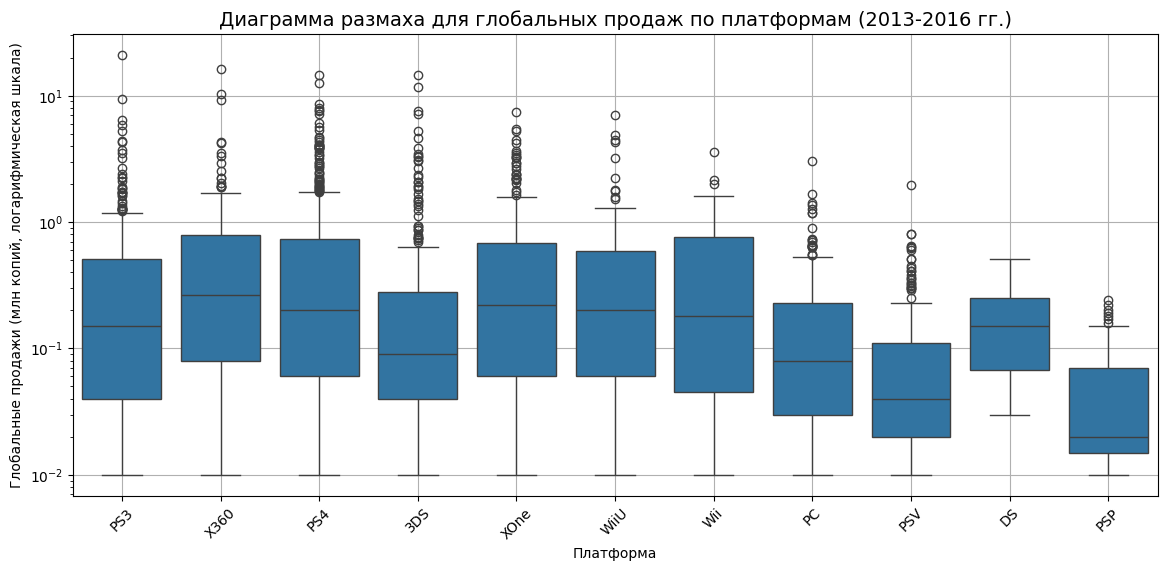

In [42]:
# построим боксплоты на одном графике
plt.figure(figsize=(14, 6))

sns.boxplot(x='platform', y='global_sales', data=actual_data)

plt.yscale('log')  # логарифмическая шкала, чтобы лучше было видно разброс
plt.title('Диаграмма размаха для глобальных продаж по платформам (2013-2016 гг.)', fontsize=14)
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи (млн копий, логарифмическая шкала)')
plt.xticks(rotation=45)
plt.grid(True)

plt.show()

<div style="border: 2px solid black; padding: 10px;">
  <strong>Выводы:</strong>
  <ul> 
    <li>PS3, X360, PS4 — платформы с самой высокой медианой глобальных продаж. У них также широкий межквартильный размах, что говорит о большом разбросе продаж между играми.</li>
    <li>PSP, PSV, PC — медианные значения у них заметно ниже. Это может говорить о меньшем коммерческом успехе игр на этих платформах в рассматриваемый период.</li> 
    <li>Особенно заметно количество игр-хитов у PS3, X360, PS4, 3DS, XOne. Такие игры продались на десятки миллионов копий (отображены как точки выше "усов").</li> 
    <li>PS3, X360, PS4, XOne — отличные платформы с точки зрения устойчивых высоких продаж. Но учитывая снижение популярности устаревающих моделей, лучше сделать акцент на более новые модели - <strong>PS4, XOne</strong>.</li> 
  </ul>
</div>

### Влияние оценок на продажи

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Проанализируем эту взаимосвязь на примере платформы **PlayStation 3 (PS3)**. Почему именно она:
- Лидер по продажам за последние 5 лет наблюдений — больше данных для анализа.
- Завершает свой жизненный цикл, что позволяет увидеть полную картину: как отзывы влияли на продажи не только на старте, но и на спаде популярности.
- Больше отзывов (и от критиков, и от пользователей), т.к. игр выпущено много, и они успели получить оценки.
- PS3 даёт устойчивую статистику, что важно при оценке связи между оценками и продажами.

In [43]:
# напишем функцию для нахождения корреляций
def get_score_corr(df):
    critic_corr = df['critic_score'].corr(df['global_sales'])
    user_corr = df['user_score'].corr(df['global_sales'])
    
    print(f'Корреляция между оценками критиков и продажами: {critic_corr:.2f}')
    print(f'Корреляция между оценками пользователей и продажами: {user_corr:.2f}')
    print()

In [44]:
# отбираем данные по платформе PS3 за весь период ее нахождения на рынке
ps3_data = data[(data['platform'] == 'PS3') & 
                       (data['critic_score'].notna()) & 
                       (data['user_score'].notna())]

**Диаграмма рассеяния: влияние оценок критиков на продажи**

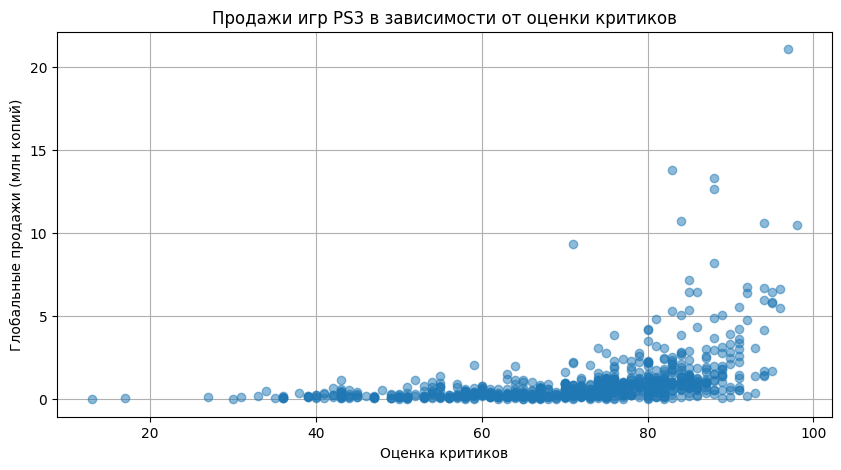

In [45]:
# строим диаграмму рассеяния
plt.figure(figsize=(10, 5))

plt.plot(ps3_data['critic_score'], ps3_data['global_sales'], 'o', alpha=0.5)

plt.title('Продажи игр PS3 в зависимости от оценки критиков')
plt.xlabel('Оценка критиков')
plt.ylabel('Глобальные продажи (млн копий)')
plt.grid(True)

plt.show()

**Диаграмма рассеяния: влияние оценок пользователей на продажи**

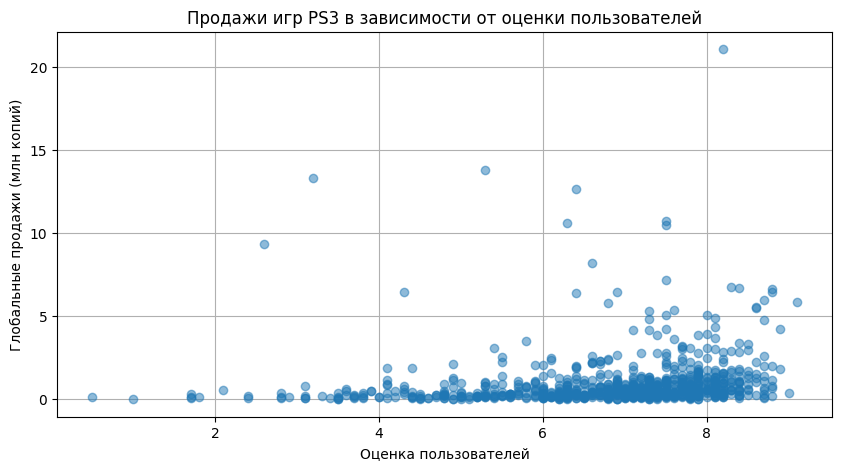

In [46]:
# строим диаграмму рассеяния
plt.figure(figsize=(10, 5))

plt.plot(ps3_data['user_score'], ps3_data['global_sales'], 'o', alpha=0.5)

plt.title('Продажи игр PS3 в зависимости от оценки пользователей')
plt.xlabel('Оценка пользователей')
plt.ylabel('Глобальные продажи (млн копий)')
plt.grid(True)

plt.show()

In [47]:
# посчитаем корреляцию между оценками критиков/пользователей и продажами

print(f'Корреляции для PlayStation 3 (PS3)')
get_score_corr(ps3_data)

Корреляции для PlayStation 3 (PS3)
Корреляция между оценками критиков и продажами: 0.43
Корреляция между оценками пользователей и продажами: 0.14



<div style="border: 2px solid black; padding: 10px;">
  <strong>Выводы:</strong>
  <ul> 
    <li>Связь между продажами и оценкой критиков - умеренно положительная (коэффициент корреляции - 0.43). Это говорит о том, что чем выше оценка критиков, тем выше, как правило, продажи. Связь не очень сильна, но заметна.</li>
    <li>Вероятно, критики влияют на восприятие игры до её выхода или в первые дни продаж, что может подтолкнуть к покупке. Это логично, так как профессиональные обзоры чаще попадают в рекламные кампании и формируют репутацию игры.</li> 
    <li>Связь между продажами и оценкой пользователей почти отсутствует, такие оценки слабо сказываются на количестве продаж.</li> 
    <li>Оценки пользователей часто появляются после выхода и покупки игры, то есть они не влияют на покупку напрямую.</li>
   <li>Диаграммы рассеяния подтверждают выводы: связь с оценками пользователей содержит больше выбросов и зависимость менее четкая по сравнению с оценками критиков.</li>   
  </ul>
</div>

**Соотнесение выводов с продажами на других платформах**

Соотнесение полученных результатов с другими платформами поможет понять, насколько универсальна связь оценок и продаж, а также влияет ли тип платформы на восприятие оценок.

Для этого рассмотрим следующие платформы:
- **Xbox 360 (X360)** — тоже популярна и сравнима с PS3.
- **PlayStation 4 (PS4) и Xbox One (XOne)** — более новые, перспективные, но с ограниченным числом лет (можно смотреть 2013–2016).
- **Nintendo 3DS** — портативная платформа, интересна для контраста.

In [48]:
# отбираем данные по платформам за весь период их нахождения на рынке

x360_data = data[(data['platform'] == 'X360') & 
                       (data['critic_score'].notna()) & 
                       (data['user_score'].notna())]

ps4_data = data[(data['platform'] == 'PS4') & 
                       (data['critic_score'].notna()) & 
                       (data['user_score'].notna())]

xone_data = data[(data['platform'] == 'XOne') & 
                       (data['critic_score'].notna()) & 
                       (data['user_score'].notna())]

n3ds_data = data[(data['platform'] == '3DS') & 
                       (data['critic_score'].notna()) & 
                       (data['user_score'].notna())]

In [49]:
# проверим корреляции для других топовых платформ

print(f'Корреляции для Xbox 360 (X360)')
get_score_corr(x360_data)

print(f'Корреляции для PlayStation 4 (PS4)')
get_score_corr(ps4_data)

print(f'Корреляции для Xbox One (XOne)')
get_score_corr(xone_data)

print(f'Корреляции для Nintendo 3DS (3DS)')
get_score_corr(n3ds_data)

Корреляции для Xbox 360 (X360)
Корреляция между оценками критиков и продажами: 0.39
Корреляция между оценками пользователей и продажами: 0.11

Корреляции для PlayStation 4 (PS4)
Корреляция между оценками критиков и продажами: 0.41
Корреляция между оценками пользователей и продажами: -0.03

Корреляции для Xbox One (XOne)
Корреляция между оценками критиков и продажами: 0.41
Корреляция между оценками пользователей и продажами: -0.09

Корреляции для Nintendo 3DS (3DS)
Корреляция между оценками критиков и продажами: 0.34
Корреляция между оценками пользователей и продажами: 0.23



<div style="border: 2px solid black; padding: 10px;">
  <strong>Выводы:</strong>
  <ul> 
    <li>На всех топовых платформах связь между оценками критиков и продажами значительно сильнее, чем между пользовательскими оценками и продажами. Это подтверждает предыдущие выводы.</li>
    <li>У платформ нового поколения (PS4, XOne) пользовательские оценки практически не влияют на продажи (нулевая корреляция). Возможно отзывов пользователей для них еще недостаточно.</li> 
    <li>Nintendo 3DS — интересный случай: cлабая, но всё же заметная корреляция как с критиками, так и с пользователями. Возможно портативные платформы имеют другую аудиторию (детская/семейная), которая склонна ориентироваться не только на обзоры профессионалов, но и на пользовательские оценки.</li>
  </ul>
</div>

### Анализ жанров

На этом шаге исследуем:
- Распределение количества игр по жанрам;
- Суммарные и медианные продажи по жанрам;
- Cамые прибыльные и наименее успешные жанры;
- Жанры-лидеры по количеству и объёму продаж.

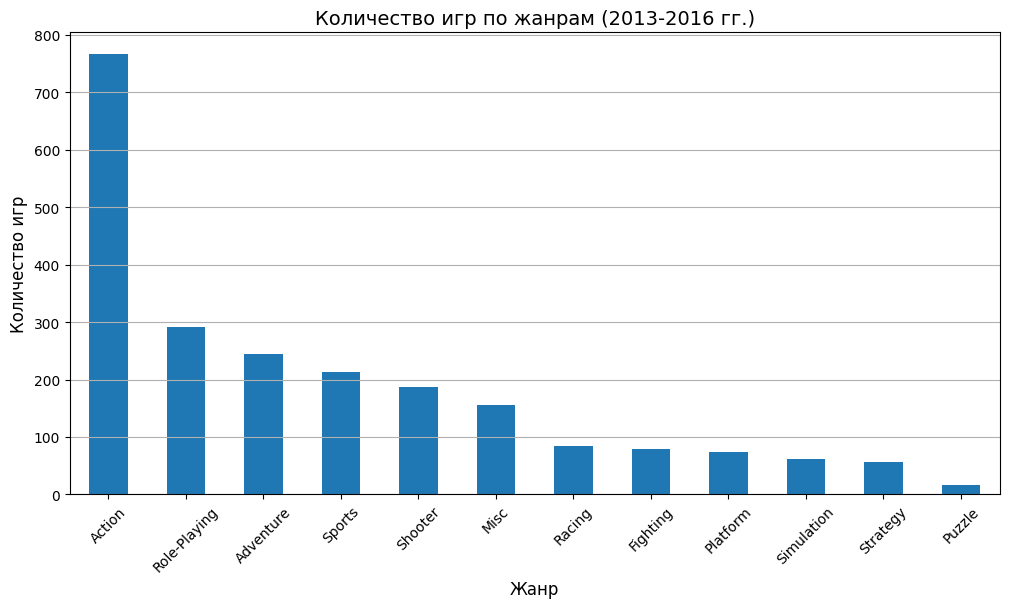

In [50]:
# группируем и считаем количество игр по жанрам
genre_counts = actual_data['genre'].value_counts().sort_values(ascending=False)

# cтроим график
genre_counts.plot(kind='bar', figsize=(12, 6))

plt.title('Количество игр по жанрам (2013-2016 гг.)', fontsize=14)
plt.xlabel('Жанр', fontsize=12)
plt.ylabel('Количество игр', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()

<div style="border: 2px solid black; padding: 10px;">
  <strong>Наблюдения по genre:</strong>
  <ul> 
    <li>Жанр Action значительно превосходит остальные по количеству игр, превышая 700 единиц. Это самый популярный жанр в указанный период.</li>
    <li>Жанры RPG, Adventure и Sports занимают второе, третье и четвертое места соответственно, с количеством игр около 200-300. Они заметно уступают Action, но всё ещё популярны.
</li> 
    <li>Жанры Shooter и Misc имеют около 150-200 игр, что указывает на умеренный интерес разработчиков и игроков.</li> 
    <li>Остальные жанры имеют наименьшее количество игр (менее 100), что говорит об их нишевой популярности.</li>
  </ul>
</div>

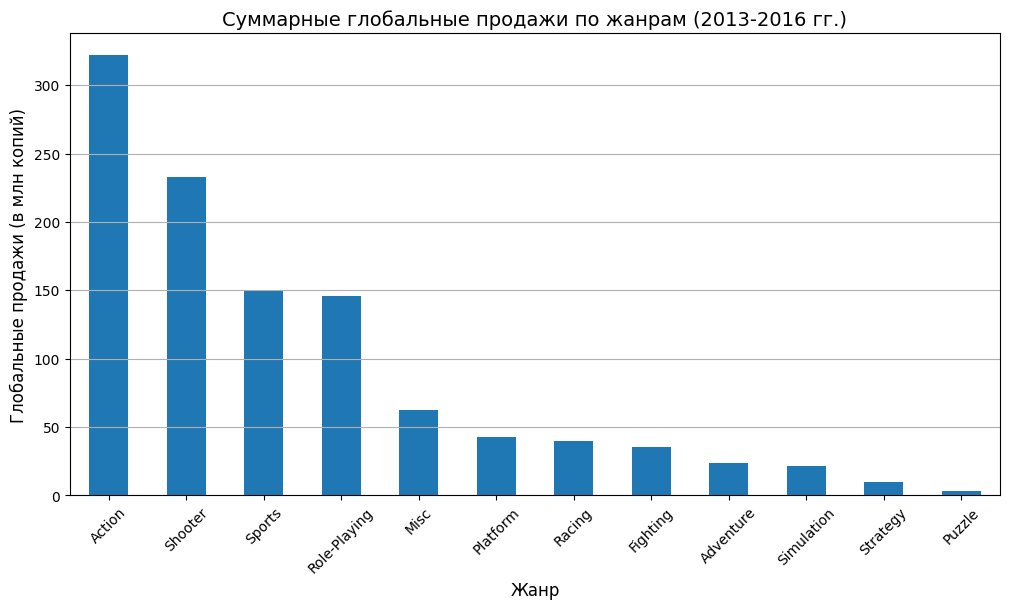

In [51]:
# группируем и суммируем глобальные продажи по жанрам
genre_sales = actual_data.groupby('genre')['global_sales'].sum().sort_values(ascending=False)

# строим график
genre_sales.plot(kind='bar', figsize=(12, 6))

plt.title('Суммарные глобальные продажи по жанрам (2013-2016 гг.)', fontsize=14)
plt.xlabel('Жанр', fontsize=12)
plt.ylabel('Глобальные продажи (в млн копий)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()

<div style="border: 2px solid black; padding: 10px;">
  <strong>Наблюдения по суммарным продажам:</strong>
  <ul> 
    <li>Action имеет наибольшие суммарные продажи, превышающие 300 миллионов копий. Это подтверждает его коммерческую успешность и популярность среди игроков.
</li>
    <li>Жанры Shooter, Sports и RPG следуют за Action с продажами около 150–230 миллионов копий. Shooter заметно опережает, что может указывать на высокий спрос при том, что количество выпускаемых игр не так велико.</li> 
    <li>Жанр Misc имеет продажи более 50 миллионов копий, что делает его менее популярным, но всё ещё значимым на рынке.</li> 
    <li>Особенно низкие показатели у Puzzle (и в продажах, и в количестве выпускаемых игр), что говорит о меньшем спросе на такие игры среди исследуемых платформ. Скорее всего большая часть паззл-игр выпускается на мобильных устройствах, на "больших" платформах они в меньшинстве и часто не окупаются.</li> 
  </ul>
</div>

Важно учитывать, что суммарные продажи могут быть искажены хитами, а количество релизов не показывает, насколько они успешны. Чтобы корректно определить прибыльность жанров, стоит дополнительно проанализировать медианные продажи по жанрам. Это даст объективное представление о средней прибыльности игры в каждом жанре.

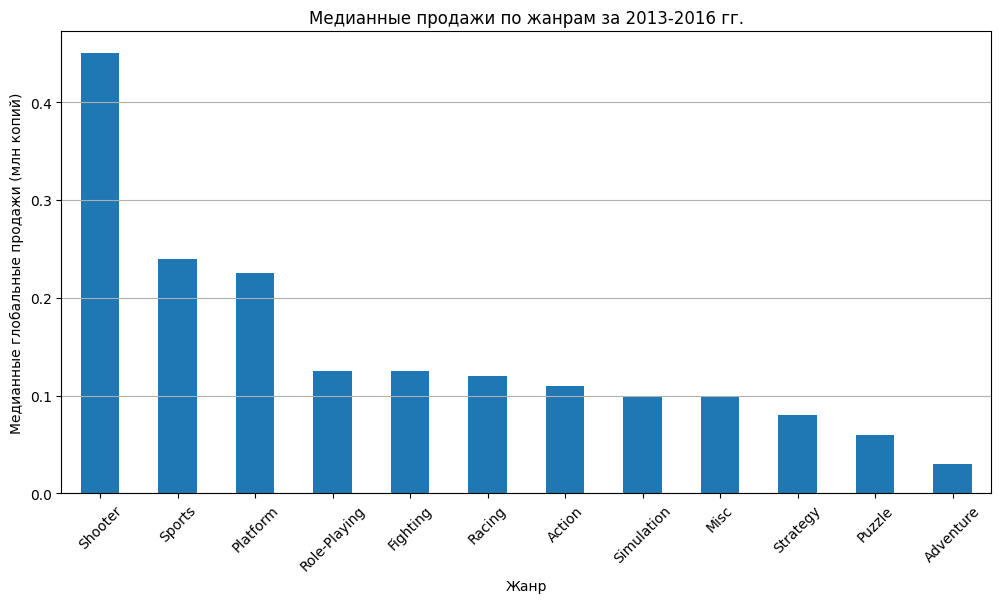

In [52]:
# группируем медианные продажи по жанрам
median_sales = actual_data.groupby('genre')['global_sales'].median().sort_values(ascending=False)

# строим график
median_sales.plot(x=median_sales.index, y=median_sales.values, kind='bar', figsize=(12, 6))

plt.title('Медианные продажи по жанрам за 2013-2016 гг.')
plt.ylabel('Медианные глобальные продажи (млн копий)')
plt.xlabel('Жанр')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()

In [53]:
# выведем точные медианные продажи по жанрам
median_sales

genre
Shooter         0.450
Sports          0.240
Platform        0.225
Role-Playing    0.125
Fighting        0.125
Racing          0.120
Action          0.110
Simulation      0.100
Misc            0.100
Strategy        0.080
Puzzle          0.060
Adventure       0.030
Name: global_sales, dtype: float64

<div style="border: 2px solid black; padding: 10px;">
  <strong>Выводы:</strong>
  <ul> 
    <li>Shooter (0.45 млн копий) — заметный лидер по медианным продажам. Это значит, что даже "средняя" игра в жанре шутеров продаётся лучше, чем игры других жанров. Жанр стабильно коммерчески успешен.</li>
    <li>Sports (0.24 млн копий) и Platform (0.225 млн копий) — тоже входят в топ по прибыльности, показывая хорошие показатели средней продажи на игру.</li> 
    <li>RPG (0.125 млн), Fighting (0.125 млн), Racing (0.12 млн) — эти жанры показывают умеренные медианные продажи, что говорит о потенциальной прибыльности, но с меньшей стабильностью по сравнению с лидерами.</li> 
    <li>Action (0.110 млн), Simulation (0.100 млн), Misc (0.100 млн) - несмотря на свою популярность по числу релизов (особенно Action), медианные продажи у них не такие высокие. Это говорит о большом количестве игр с невысокими продажами.</li>
    <li>Strategy (0.080 млн), Puzzle (0.060 млн), Adventure (0.030 млн) — игры этих жанров в среднем продаются хуже всех. Возможно они популярнее на мобильных платформах.</li>
  </ul>
</div>

## Портреты пользователей

Определим для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5);
- Самые популярные жанры (топ-5);
- Влияние рейтинга ESRB на продажи в отдельном регионе.

Заранее напишем функцию для построения круговой диаграммы для распределения продаж по платформам:

In [54]:
# напишем функцию для построения круговой диаграммы
def get_pie_plot(df):
    top_n = 5 # отобразим только топ-5, а остальные объединим
    top_data = df[:top_n]
    others = df[top_n:].sum()
    top_data['Others'] = others

    top_data.plot(kind='pie', autopct='%1.1f%%', startangle=140, figsize=(7, 7))
    plt.title('Распределение продаж по платформам за 2013-2016 гг.')
    plt.ylabel('')  # убираем подпись оси Y
    plt.tight_layout()
    plt.show()

### Пользователь из Северной Америки (NA)

In [55]:
# топ-5 платформ за 2013-2016 гг.
top_platforms_na = actual_data.groupby('platform')['na_sales'].sum().sort_values(ascending=False)

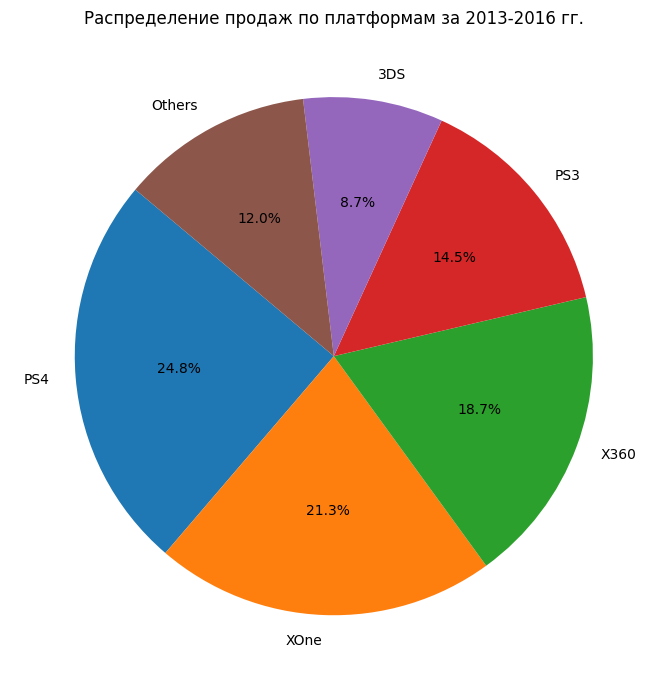

In [56]:
# построим круговую диаграмму
get_pie_plot(top_platforms_na)

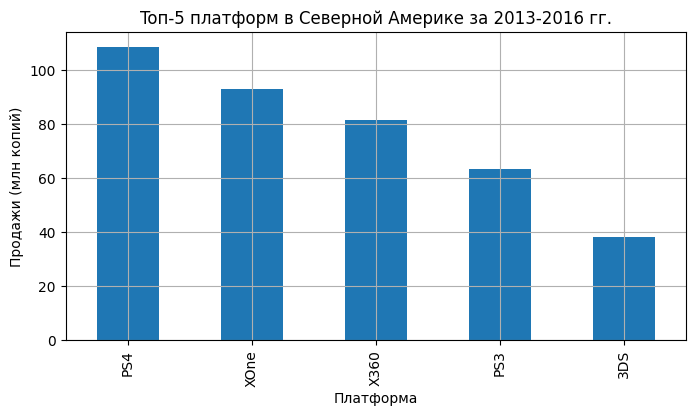

In [57]:
# строим график
top_platforms_na.head(5).plot(kind='bar', title='Toп-5 платформ в Северной Америке за 2013-2016 гг.', xlabel='Платформа', ylabel='Продажи (млн копий)', grid=True, figsize=(8, 4))
plt.show()

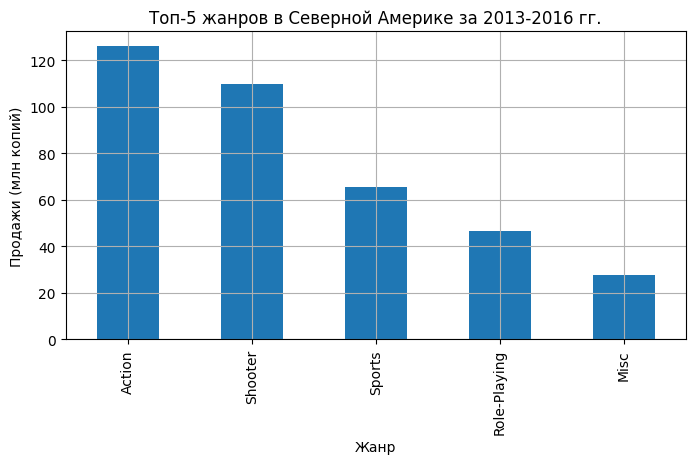

In [58]:
# топ-5 жанров за 2013-2016 гг.
top_genres_na = actual_data.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)

# строим график
top_genres_na.plot(kind='bar', title='Тoп-5 жанров в Северной Америке за 2013-2016 гг.', xlabel='Жанр', ylabel='Продажи (млн копий)', grid=True, figsize=(8, 4))
plt.show()

<div style="border: 2px solid black; padding: 10px;">
  <strong>Выводы:</strong>
  <ul> 
    <li>PS4 - младшее поколение, но уже заняла сильную лидирующую позицию.</li>   
    <li>В Северной Америке явно популярны домашние консоли Xbox (2-е и 3-е место), что говорит о сильной позиции Microsoft на локальном рынке.</li>
    <li>У PlayStation 3 тоже высокая популярность, но уступает Xbox 360.</li> 
    <li>Xbox One - успешное продолжение Xbox 360, конкурирует с PS4.</li> 
    <li>5-е место среди платформ - карманная консоль от Nintendo (возможно устойчивый интерес в семейном сегменте).</li>
    <li>Американская аудитория предпочитает динамичные и соревновательные жанры: Action, Shooter, Sports, RPG.</li>
    <li>5-е место среди жанров - Misc: головоломки, пати-игры и др.</li>
  </ul>
</div>

### Пользователь из Европы (EU)

In [59]:
# топ-5 платформ за 2013-2016 гг.
top_platforms_eu = actual_data.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)

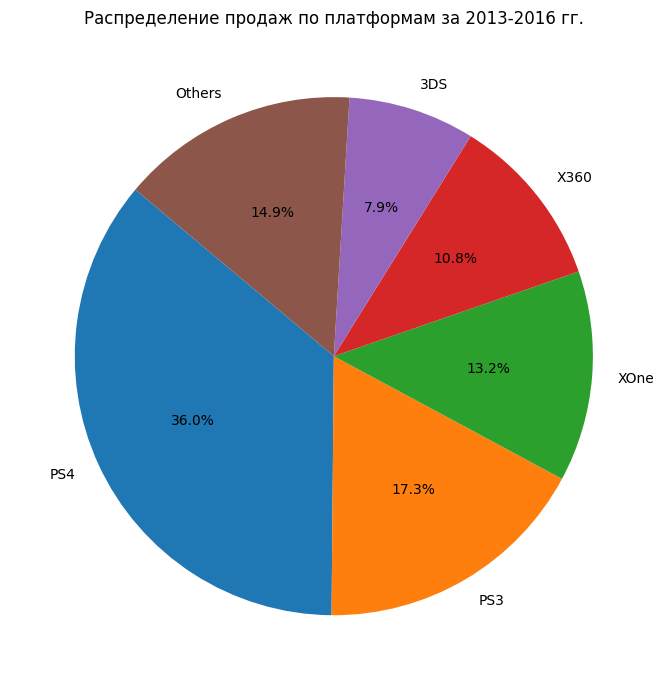

In [60]:
# построим круговую диаграмму
get_pie_plot(top_platforms_eu)

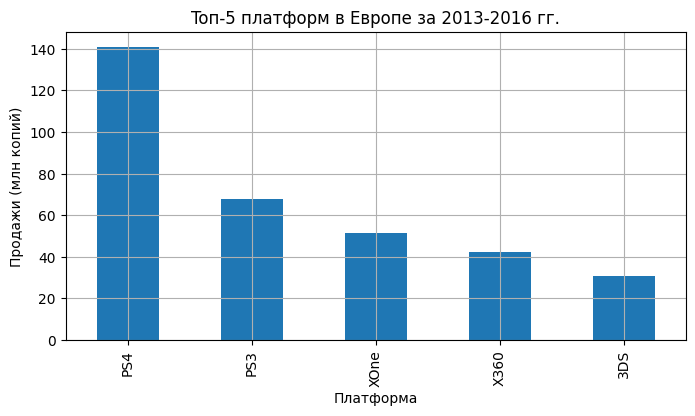

In [61]:
# строим график
top_platforms_eu.head(5).plot(kind='bar', title='Toп-5 платформ в Европе за 2013-2016 гг.', xlabel='Платформа', ylabel='Продажи (млн копий)', grid=True, figsize=(8, 4))
plt.show()

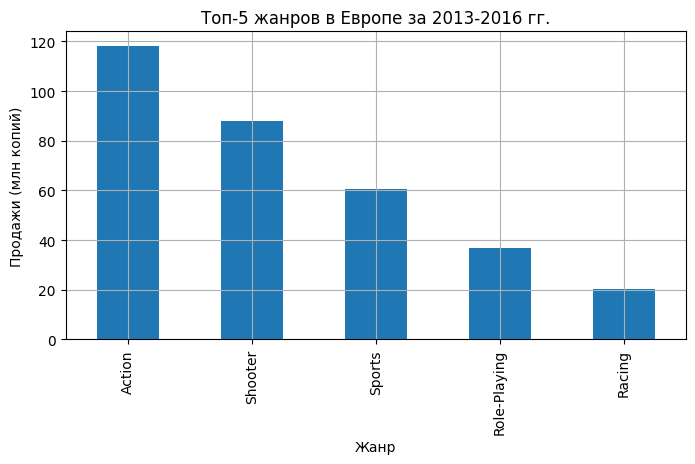

In [62]:
# топ-5 жанров за 2013-2016 гг.
top_genres_eu = actual_data.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)

# строим график
top_genres_eu.plot(kind='bar', title='Тoп-5 жанров в Европе за 2013-2016 гг.', xlabel='Жанр', ylabel='Продажи (млн копий)', grid=True, figsize=(8, 4))
plt.show()

<div style="border: 2px solid black; padding: 10px;">
  <strong>Выводы:</strong>
  <ul> 
    <li>В Европе доминируют консоли PlayStation. Возможно это связано с сильным присутствием Sony на рынке и маркетинговыми стратегиями, ориентированными на европейского игрока.</li>
    <li>У PS4 - быстрый рост, высокая популярность, особенно в последние годы (1-е место).</li> 
    <li>У Xbox One и Xbox 360 хорошие позиции, но они уступают PlayStation.</li>
    <li>Nintendo 3DS имеет стабильные продажи в сегменте портативных игр.</li> 
    <li>Как и в Северной Америке, в Европе универсально любимы жанры Action (явный лидер), Shooter, Sports, RPG.</li>
    <li>Но в Европе больше любят гонки (5-е место среди жанров) — возможно, из-за таких франшиз как Gran Turismo, F1.</li>
  </ul>
</div>

### Пользователь из Японии (JP)

In [63]:
# топ-5 платформ за 2013-2016 гг.
top_platforms_jp = actual_data.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)

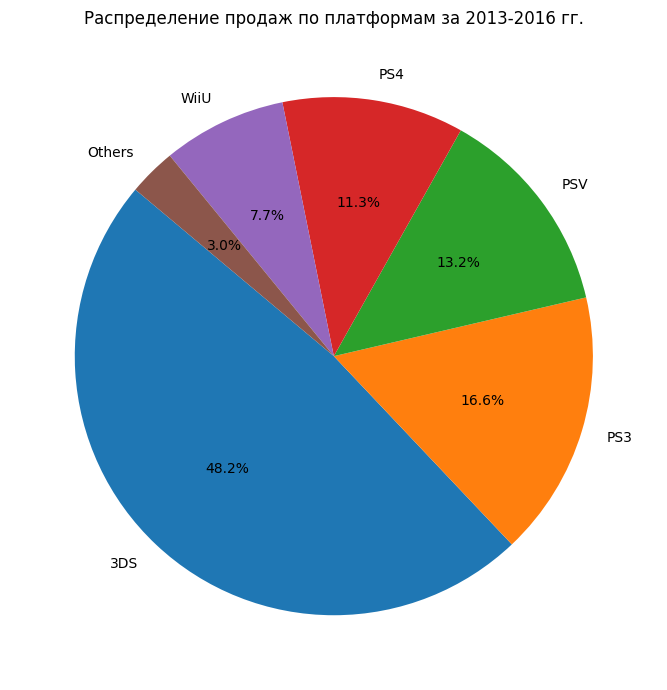

In [64]:
# построим круговую диаграмму
get_pie_plot(top_platforms_jp)

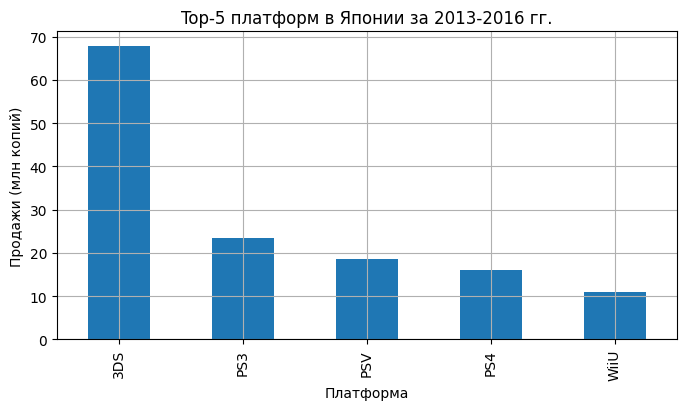

In [65]:
# строим график
top_platforms_jp.head(5).plot(kind='bar', title='Top-5 платформ в Японии за 2013-2016 гг.', xlabel='Платформа', ylabel='Продажи (млн копий)', grid=True, figsize=(8, 4))
plt.show()

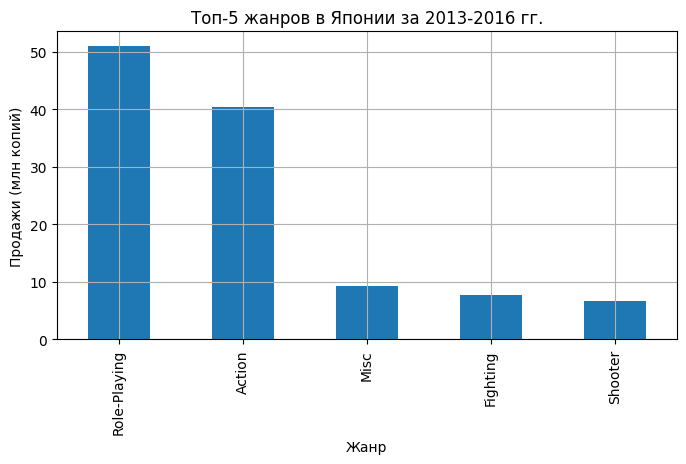

In [66]:
# топ-5 жанров за 2013-2016 гг.
top_genres_jp = actual_data.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)

# строим график
top_genres_jp.plot(kind='bar', title='Тoп-5 жанров в Японии за 2013-2016 гг.', xlabel='Жанр', ylabel='Продажи (млн копий)', grid=True, figsize=(8, 4))
plt.show()

<div style="border: 2px solid black; padding: 10px;">
  <strong>Выводы:</strong>
  <ul> 
    <li>Nintendo 3DS - абсолютный лидер. В Японии популярнее портативные консоли.</li> 
    <li>2-е и 4-е места среди платформ - PlayStation. Хорошие продажи.</li> 
    <li>3-е место - портативка PSV. Еще один пример любви к карманным консолям.</li>
    <li>5-е место - консоль WiiU. Это говорит в пользу локальной поддержки бренда Nintendo в Японии.</li>
    <li>В отличие от Европы и Северной Америки, портативные консоли популярнее в Японии (3DS, PSV). Это может быть связано с культурными особенностями — ограниченное пространство в домах, активная городская жизнь и т.п.</li>
    <li>В рейтинге жанров RPG обгоняет Action, но оба жанра очень популярны.</li>
    <li>Также в топ попали жанры Misc, Fighting и Shooter. </li>
    <li>В Японии не так популярны спортивные игры, зато высок интерес к ролевым играм, файтингам и шутерам.</li>  
    <li>Японская аудитория ориентирована на локальный контент и имеет свои региональные тренды, заметно отличающиеся от западных.</li>   
  </ul>
</div>

### Влияние рейтинга ESRB на продажи в регионах

**Расшифровка рейтинга**

- **EC (Early Childhood)** - для самых маленьких детей (3+). Образовательно-развлекательные игры.
- **E (Everyone)** - подходит всем (6+).
- **E10+ (Everyone 10+)** - немного больше фантазийного насилия или юмора.
- **T (Teen)** - для подростков и старше (13+). Может содержать насилие, специфичную лексику.
- **M (Mature)** - для зрелых (17+). Содержит серьёзное насилие, нецензурную лексику, сексуальный контент.
- **AO (Adults Only)** - только для взрослых (18+). Очень жесткий контент, почти не используется, запрещено на консолях.
- **RP (Rating Pending)** - ожидает оценки ESRB, часто в демо или анонсах.

Также в данных фигурирует обозначение **unknown**, если рейтинг игры неизвестен.

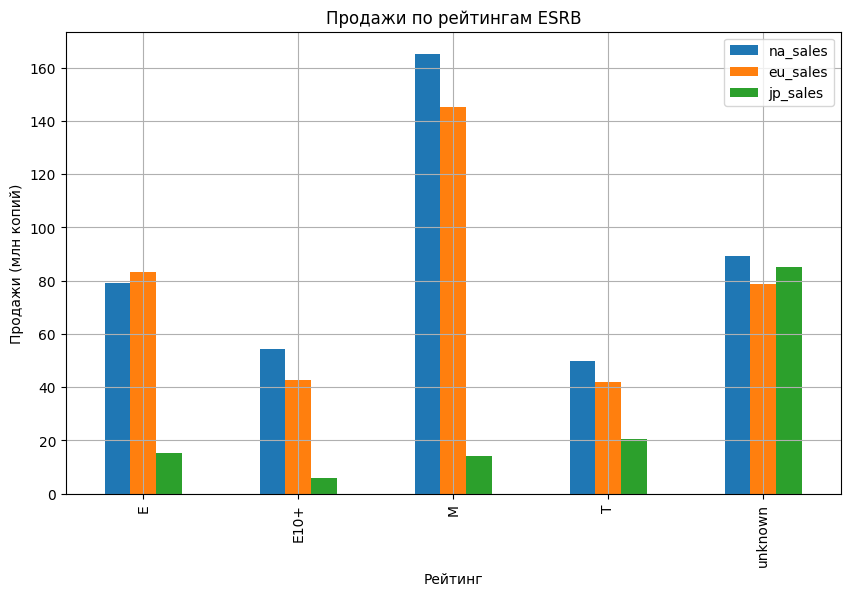

In [67]:
# считаем продажи в регионах по рейтингу ESRB
esrb_sales = actual_data.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum()

# строим график
esrb_sales.plot(kind='bar', figsize=(10, 6), title='Продажи по рейтингам ESRB', grid=True)
plt.ylabel('Продажи (млн копий)')
plt.xlabel('Рейтинг')
plt.show()

<div style="border: 2px solid black; padding: 10px;">
  <strong>Выводы:</strong>
  <ul> 
    <li>Распределения Северной Америки и Европы очень похожи: самый продаваемый рейтинг — M (аудитория взрослых игроков на Западе — ключевая для рынка), следующие по популярности - семейные игры (E и E10+) и игры для подростков (T), а вот игры для самых маленьких (EC) почти не приносят прибыли на рассматриваемых платформах. </li>
    <li>Продажи в Европе местами ниже, но структура похожа на американскую, что говорит о схожих потребительских предпочтениях между регионами.</li> 
    <li>В Японии рейтинг M непопулярен, а большой объём продаж приходится на игры с неуказанным или неизвестным рейтингом ("unknown"), что может быть связано с локальными особенностями сертификации. Возможно, большая часть японских игр просто не имеет официального рейтинга ESRB (западная ассоциация).</li>
    <li>Рейтинг AO на графике отсутствует, так как такие игры запрещены для консолей.</li> 
    <li>Рейтинг RP - незначительно маленький показатель. Игр, ожидающих оценки, мало. Логично, что они в целом почти не приносят доход.</li>
  </ul>
</div>

## Проверка гипотез

### Гипотеза №1

"Средние пользовательские рейтинги платформ Xbox One и PC одинаковые."

Выдвигаем гипотезы:

- **Нулевая гипотеза**: Средние пользовательские рейтинги Xbox One и PC одинаковые.
- **Альтернативная гипотеза**: Средние пользовательские рейтинги Xbox One и PC различаются.

Проведем двусторонний t-тест для двух независимых выборок:

In [68]:
# отфильтруем пользовательские рейтинги для Xbox One и PC, исключив пропуски
xone_ratings = actual_data[(actual_data['platform'] == 'XOne') & (actual_data['user_score'].notna())]['user_score']
pc_ratings = actual_data[(actual_data['platform'] == 'PC') & (actual_data['user_score'].notna())]['user_score']

alpha = 0.05 # уровень статистической значимости

results = st.ttest_ind(xone_ratings, pc_ratings, equal_var=False) # выборки не равны

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-значение: 0.14759594013430466
Не отвергаем нулевую гипотезу


**Итог:** Результат означает, что при уровне значимости 5% различия между средними пользовательскими рейтингами платформ Xbox One и PC (за период 2013-2016 гг.) статистически незначимы.

### Гипотеза №2

"Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные."

Выдвигаем гипотезы:

- **Нулевая гипотеза**: Средние пользовательские рейтинги жанров Action и Sports одинаковые.
- **Альтернативная гипотеза**: Средние пользовательские рейтинги жанров Action и Sports разные.

Проведем двусторонний t-тест для двух независимых выборок:

In [69]:
# отбираем выборки
action_ratings = actual_data[actual_data['genre'] == 'Action']['user_score'].dropna()
sports_ratings = actual_data[actual_data['genre'] == 'Sports']['user_score'].dropna()


alpha = 0.05 # уровень статистической значимости

results = st.ttest_ind(action_ratings, sports_ratings, equal_var=False) # выборки не равны

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-значение: 1.4460039700704315e-20
Отвергаем нулевую гипотезу


**Итог:** Результат означает, что при уровне значимости 5% различие в средних пользовательских рейтингах (за период 2013-2016 гг.) между жанрами Action и Sports является статистически значимым.

## Общий вывод

### Предобработка данных

*Работа с дубликатами*
- Явные дубликаты отсутствовали;
- В столбце **user_score** заменили текстовое обозначение отсутствующих данных "tbd" на пропуски;
- Были найдены и устранены дубликаты в данных, сгруппированных по ключевым столбцам - **name, platform, year_of_release, genre**;
- В других столбцах дубликаты не найдены или поиск дубликатов в них не требовался.

*Работа с пропусками*
- На начало обработки пропуски присутствовали в 6 из 11 столбцов и составляли от 0.01% до 54.59% столбца;
- В результате получилось устранить пропуски в 4 из 6 столбцов, значительно снизив их общее количество;
- Удаление/заполнение оставшихся пропусков не имело смысла и могло исказить результаты анализа;
- Необходимо уточнить природу пропусков и попытаться восстановить данные, если это возможно.

*Изменение типов данных*
- Исправили тип данных столбцов **year_of_release** и **user_score**.

*Добавление новых столбцов в таблицу* 
- Посчитаны суммарные продажи для всех регионов;
- Результаты подсчета записаны в новый столбец **global_sales**. 

*Обработка аномальных значений*
- Не требовалась.

Этот этап позволил очистить данные и подготовить их к дальнейшему анализу.

### Исследовательский анализ данных

*Выпуск игр по годам*
- Массовый рост начался с середины 1990-х благодаря технологическому прогрессу.
- Пик выпуска — 2007–2010 гг. (~1200–1400 игр в год).
- После 2010 г. — спад, но остаётся высокий уровень (600–800 игр).
- Для анализа целесообразен период 2013–2016 — отражает актуальные рыночные тренды.

*Анализ продаж по платформам за весь период*
- Жизненный цикл платформ примерно 8–10 лет, пик — на 3–5 году.
- Это подтверждает выбор фокуса на 2013–2016 гг. как актуальный срез рынка.

*Анализ продаж по платформам за 2013-2016 гг.*
- Новые консоли (PS4, Xbox One) — растущие тренды, перспективны.
- Устаревающие платформы (PS3, Xbox 360, 3DS) — быстро теряют популярность.
- PS4, PS3 и Xbox One — лидеры по глобальным продажам и количеству хитов.
- Для фокусировки рекомендованы PS4 и Xbox One — актуальны и успешны.

*Влияние оценок на продажи* 
- Отзывы критиков влияют на продажи больше, чем отзывы пользователей.
- Высокий балл от критиков может служить сильным маркетинговым фактором, особенно на старте.
- Пользовательские оценки — важны, но скорее как сигнал качества «задним числом», а не драйвер продаж.
- Для портативных консолей (3DS) оценки пользователей имеют чуть большее значение — возможны возрастные/семейные особенности аудитории.

*Анализ жанров*
- Самые прибыльные жанры — Shooter, Sports, Platform. Имеют наивысшие медианные продажи, стабильны и коммерчески успешны.
- Жанры средней прибыльности — RPG, Fighting, Racing. Могут быть прибыльны, но менее предсказуемы.
- Жанр Action популярен, но имеет низкие медианные продажи — много игр с небольшими продажами.
- Наименее прибыльные жанры — Adventure, Puzzle, Strategy. Характеризуются низким спросом на исследуемых платформах.

### Портреты пользователей

*Предпочтения по платформам*
- **Северная Америка**: лидируют домашние консоли (особенно Xbox, несмотря не первенство PS4), портативные консоли — на 5 месте (Nintendo 3DS).
- **Европа**: уверенное лидерство PlayStation, Xbox чуть менее популярна, портативные консоли также представлены.
- **Япония**: доминируют портативные консоли (3DS, PSV), домашние консоли PlayStation тоже популярны, но на вторых ролях, 5-е место - консоль WiiU от Nintendo.

*Предпочтения по жанрам*
- **Северная Америка и Европа**: любят Action, Shooter, Sports, RPG. В Европе отдельно выделяются гонки (Racing).
- **Япония**: акцент на RPG, Action, Fighting, Shooter. В отличие от западного тренда, жанр Sports не попал в топ.

*Влияние рейтинга ESBR*
- **Северная Америка и Европа**: самый продаваемый рейтинг — M (аудитория взрослых игроков на Западе — ключевая для рынка), следующие по популярности - семейные игры и игры для подростков, а вот игры для самых маленьких почти не приносят прибыли на рассматриваемых платформах.
- **Япония**: рейтинг M непопулярен, а большой объём продаж приходится на игры с неуказанным или неизвестным рейтингом ("unknown"), что может быть связано с локальными особенностями сертификации. Возможно, большая часть японских игр просто не имеют официального рейтинга ESRB.

### Проверка гипотез

*Гипотеза №1*
- Нулевая гипотеза предполагала, что средние пользовательские рейтинги Xbox One и PC одинаковые.
- При уровне значимости 5% было получено p-значение 0.61307, что не позволяет отвергнуть нулевую гипотезу.
- Таким образом, различия между средними пользовательскими рейтингами платформ Xbox One и PC (за период 2013-2016 гг.) статистически незначимы.

*Гипотеза №2*
- Нулевая гипотеза предполагала, что средние пользовательские рейтинги жанров Action и Sports одинаковые.
- При уровне значимости 5% было получено p-значение 1.11956e-18, что позволяет отвергнуть нулевую гипотезу.
- Это значит, что различие в средних пользовательских рейтингах (за период 2013-2016 гг.) между жанрами Action и Sports является статистически значимым.

### Рекомендации заказчику

Это информация позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Фокус на актуальных и перспективных платформах**
- Основной интерес аудитории с 2013 года смещается на новые консоли — PlayStation 4 и Xbox One.
- Эти платформы ещё не достигли пика своего жизненного цикла, показывают высокие продажи и устойчивый спрос.
- Рекомендуется приоритизировать продажу игр именно на них.

**Учитывать особенности платформ при планировании продаж**
- Приоритет на новых платформах (PS4 и Xbox One).
- Устаревающие консоли (PS3, Xbox 360) постепенно теряют актуальность — вкладываться в продажу игр для них уже нецелесообразно.
- Платформы вроде PC и портативных консолей (3DS, PSV) менее предсказуемы по продажам и зависят от специфики региона и жанра.

**Принимать во внимание оценки критиков**
- Оценки критиков заметно влияют на продажи, особенно на новых и популярных платформах. Стоит это учитывать при планировании продаж.
- Пользовательские оценки мало влияют на продажи — не стоит ставить их в центр стратегии продвижения.
- Есть смысл добавлять в карточки товара обзоры, награды и цитаты из рецензий — это стимулирует покупку.

**Делать ставку на популярные жанры**
- Игры жанра Action встречаются часто, но в среднем не такие прибыльные — важно ориентироваться на конкретные тайтлы, а не просто на жанр.
- Коммерчески успешные игры - игры жанров Shooter, Sports, Platform и Racing (высокие медианные продажи).
- Для портфеля игр магазина оптимально иметь разнообразие, но с приоритетом на жанры с высокими медианными продажами.
- Жанры вроде Adventure, Puzzle и Strategy менее прибыльны на крупных платформах — их лучше развивать на мобильных рынках, если такая цель есть.

**Адаптировать продажи под региональные особенности**
- Северная Америка: спрос на шутеры, спортивные игры, платформы Xbox и PS.
- Европа: схожа с США, но больше любят гонки, чуть сильнее позиции PS.
- Япония: ориентироваться на локальные портативные платформы и жанры RPG, Action, Fighting.

**Целиться в рейтинг «M», «E» и «T»**
- Самые прибыльные игры — с рейтингом Mature (M), а также семейные.
- Игры для самых маленьких (EC) — менее доходны.

**Планировать продажи с учётом жизненного цикла платформ**
- Пик продаж приходится на 3–5 год после выхода платформы — это нужно учитывать при планировании рекламных акций.
- Планирование закупки игр в зависимости от жизненного цикла платформ.
- Подготовка к новинкам заранее: отслеживать выход новых игр и консолей, оформлять предзаказы, готовить рекламные акции.

**Развивать рекомендации и персонализированные подборки**
- На основании анализа жанров, платформ и оценок можно создавать рекомендательные подборки. Это повысит средний чек и конверсию.